In [9]:
import torch
import torch.nn as nn

import sys
import os

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..')))

from models._model import CBPLTrainer

In [12]:
config = {
    "peak_regions":"/gladstone/corces/lab/users/vishvak/chrombpnet_tutorial/own_data/test.chr1.chr2.chr3.bed",
    "nonpeak_regions":"/gladstone/corces/lab/users/vishvak/chrombpnet_tutorial/own_data/test.chr1.negatives.adjusted.bed",
    "genome_fasta":"/gladstone/corces/lab/users/vishvak/chrombpnet_tutorial/data/downloads/hg38.fa",
    "cts_bw_file":"/gladstone/corces/lab/users/vishvak/chrombpnet_tutorial/own_data/ENCFF735AHG.bigWig",
    "negative_sampling_ratio":0.1,
    "train_size": 0.7,
    "batch_size": 32,
    "filters": 64,
    "n_dil_layers": 3,
    "conv1_kernel_size": 21,
    "dilation_kernel_size" : 3,
    "num_tasks": 1,
    "input_seq_len": 2564,
    "out_pred_len": 500,
    "learning_rate": 0.001,
    "dropout_rate" : 0
}

In [13]:
trainer =  CBPLTrainer(config)

Read in bed file of 20512 peaks
Read in bed file of 16900 peaks
Successfully loaded in data with 14781 positive and 1478 nonpeak regions!


NameError: name 'KLDivLoss' is not defined

In [9]:
trainer.model

BPNetLightning(
  (mse_loss): MSELoss()
  (initial_conv): CNNModule(
    (conv): Conv1d(4, 64, kernel_size=(21,), stride=(1,))
    (activation): ReLU()
  )
  (dilated_convs): ModuleList(
    (0): DilatedConvModule(
      (conv): Conv1d(64, 64, kernel_size=(3,), stride=(1,), dilation=(2,))
      (activation): ReLU()
    )
    (1): DilatedConvModule(
      (conv): Conv1d(64, 64, kernel_size=(3,), stride=(1,), dilation=(4,))
      (activation): ReLU()
    )
    (2): DilatedConvModule(
      (conv): Conv1d(64, 64, kernel_size=(3,), stride=(1,), dilation=(8,))
      (activation): ReLU()
    )
    (3): DilatedConvModule(
      (conv): Conv1d(64, 64, kernel_size=(3,), stride=(1,), dilation=(16,))
      (activation): ReLU()
    )
    (4): DilatedConvModule(
      (conv): Conv1d(64, 64, kernel_size=(3,), stride=(1,), dilation=(32,))
      (activation): ReLU()
    )
    (5): DilatedConvModule(
      (conv): Conv1d(64, 64, kernel_size=(3,), stride=(1,), dilation=(64,))
      (activation): ReLU()


In [4]:
trainer.dataset.seqs.shape #old

torch.Size([10823, 4, 3106])

In [7]:
trainer.dataset.seqs.shape #new

torch.Size([22913, 4, 3106])

In [8]:
trainer.dataset.cts.shape #new

torch.Size([22913, 1000])

In [7]:
trainer.dataset.coords

array([['chr1', '100038498', 'f', '1'],
       ['chr1', '100047038', 'f', '1'],
       ['chr1', '100132973', 'f', '1'],
       ...,
       ['chr1', '232944057', 'f', '0'],
       ['chr1', '87139057', 'f', '0'],
       ['chr1', '57972057', 'f', '0']], dtype='<U21')

In [7]:
inputs.shape

torch.Size([32, 4, 3106])

In [8]:
targets.shape

torch.Size([32, 1000])

In [9]:
trainer.model

BPNetLightning(
  (mse_loss): MSELoss()
  (initial_conv): CNNModule(
    (conv): Conv1d(4, 64, kernel_size=(64,), stride=(1,))
    (activation): ReLU()
  )
  (dilated_convs): ModuleList(
    (0): DilatedConvModule(
      (conv): Conv1d(64, 64, kernel_size=(3,), stride=(1,), dilation=(2,))
      (activation): ReLU()
    )
    (1): DilatedConvModule(
      (conv): Conv1d(64, 64, kernel_size=(3,), stride=(1,), dilation=(4,))
      (activation): ReLU()
    )
    (2): DilatedConvModule(
      (conv): Conv1d(64, 64, kernel_size=(3,), stride=(1,), dilation=(8,))
      (activation): ReLU()
    )
    (3): DilatedConvModule(
      (conv): Conv1d(64, 64, kernel_size=(3,), stride=(1,), dilation=(16,))
      (activation): ReLU()
    )
    (4): DilatedConvModule(
      (conv): Conv1d(64, 64, kernel_size=(3,), stride=(1,), dilation=(32,))
      (activation): ReLU()
    )
    (5): DilatedConvModule(
      (conv): Conv1d(64, 64, kernel_size=(3,), stride=(1,), dilation=(64,))
      (activation): ReLU()


In [5]:
for batch in trainer.train_dataloader:
    inputs, targets = batch
    break  
trainer.model.forward_test(inputs)

NameError: name 'trainer' is not defined

In [4]:
import matplotlib.pyplot as plt
plt.plot(targets[1])

NameError: name 'targets' is not defined

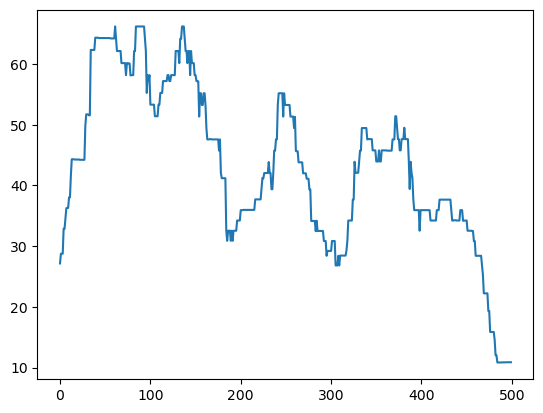

In [27]:
plt.plot(trainer.dataset.cts[49])